# Import Libraries
This cell imports essential libraries for data manipulation, visualization, and machine learning preprocessing. It also sets optional display settings for pandas.

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.metrics.pairwise import cosine_similarity
import matplotlib.pyplot as plt
import seaborn as sns

# Optional: display settings
pd.set_option('display.max_columns', None)

# Load Datasets
This cell loads the users and meals datasets from CSV files and prints their shapes to confirm successful loading.

In [2]:
users = pd.read_csv("../data/users.csv")
meals = pd.read_csv("../data/meals.csv")

print("✅ Loaded users:", users.shape)
print("✅ Loaded meals:", meals.shape)


✅ Loaded users: (1000, 12)
✅ Loaded meals: (4451, 9)


# Display Dataset Samples
This cell displays the first few rows of the users and meals datasets to provide an overview of their structure and content.

In [3]:
display(users.head())
display(meals.head())


,id,name,email,date_of_birth,sex,weight_value,height_value,activity_level,exercise_frequency,health_conditions,goal_type,motivation
0,bb8fe9cf-19db-42ac-bcee-f216f1d0c6f7,Bob Lee,boblee6068@example.com,1977-12-21,male,99.6,184.9,low,7,"['diabetes', 'hypertension']",['muscle_gain'],Get fit for summer
1,16974410-b71a-45f9-aa8e-acd20b711737,Jane Smith,janesmith297@example.com,1991-06-01,female,98.1,159.8,moderate,6,['high_cholesterol'],['weight_loss'],Doctor recommended
2,02352d6f-d182-466b-9321-bf8f7c604b43,Charlie Kim,charliekim7269@example.com,1998-11-29,non-binary,104.7,185.6,low,4,['hypertension'],['maintenance'],General wellness
3,7af66694-961f-4ac2-8911-d5402d1af23d,Alice Johnson,alicejohnson4877@example.com,1975-12-17,female,70.3,167.3,high,5,['none'],['maintenance'],General wellness
4,5b1a599b-beb6-41ed-8c31-fc641bcf3115,Elliot Alderson,elliotalderson4424@example.com,1988-06-25,female,98.9,192.8,moderate,1,['high_cholesterol'],['maintenance'],Doctor recommended


,id,user_id,meal_type,total_calories,total_protein,total_carbs,total_fat,satisfaction,created_at
0,59d38ed4-1ea6-4bb6-bb19-51d7be75392f,bb8fe9cf-19db-42ac-bcee-f216f1d0c6f7,lunch,900,37.7,93.2,7.0,medium,2025-04-04T00:01:14.230312
1,e8473f3b-136a-4f20-ac9f-52c22ddc2308,bb8fe9cf-19db-42ac-bcee-f216f1d0c6f7,dinner,319,18.7,59.3,16.7,medium,2025-04-15T00:01:14.230333
2,3088cc85-0c57-44ec-9ecf-037e32d00340,bb8fe9cf-19db-42ac-bcee-f216f1d0c6f7,snack,355,13.9,67.0,18.1,low,2025-04-03T00:01:14.230342
3,ef991661-2f51-4fd3-b42c-cd7307f9b33b,16974410-b71a-45f9-aa8e-acd20b711737,dinner,680,33.9,98.2,16.8,medium,2025-04-08T00:01:14.230351
4,9c2f5b72-27f8-4dae-a8ec-89ab2b0b72bd,16974410-b71a-45f9-aa8e-acd20b711737,dinner,722,8.0,99.3,20.6,low,2025-04-13T00:01:14.230358


# Data Preprocessing
This cell converts datetime columns, fills missing values, and performs feature engineering by calculating the age of users based on their date of birth.

In [4]:
# Convert datetime columns
meals['created_at'] = pd.to_datetime(meals['created_at'])
users['date_of_birth'] = pd.to_datetime(users['date_of_birth'])

# Fill any NaNs (if applicable)
meals.fillna(0, inplace=True)
users.fillna('', inplace=True)

# Optional: Feature engineering
users['age'] = (pd.Timestamp('now') - users['date_of_birth']).dt.days // 365


# Create User Profiles
This cell groups meal data by user ID to calculate average nutritional values and merges it with user data to create comprehensive user profiles.

In [5]:
# Group by user_id to create meal summary
user_meal_summary = meals.groupby('user_id').agg({
    'total_calories': 'mean',
    'total_protein': 'mean',
    'total_carbs': 'mean',
    'total_fat': 'mean'
}).reset_index()

# Merge with users to create a user profile
user_profiles = pd.merge(users, user_meal_summary, left_on='id', right_on='user_id', how='inner')
user_profiles.drop(columns=['user_id'], inplace=True)
user_profiles.head()


,id,name,email,date_of_birth,sex,weight_value,height_value,activity_level,exercise_frequency,health_conditions,goal_type,motivation,age,total_calories,total_protein,total_carbs,total_fat
0,bb8fe9cf-19db-42ac-bcee-f216f1d0c6f7,Bob Lee,boblee6068@example.com,1977-12-21,male,99.6,184.9,low,7,"['diabetes', 'hypertension']",['muscle_gain'],Get fit for summer,47,524.666667,23.433333,73.166667,13.933333
1,16974410-b71a-45f9-aa8e-acd20b711737,Jane Smith,janesmith297@example.com,1991-06-01,female,98.1,159.8,moderate,6,['high_cholesterol'],['weight_loss'],Doctor recommended,33,722.000000,20.300000,63.740000,15.120000
2,02352d6f-d182-466b-9321-bf8f7c604b43,Charlie Kim,charliekim7269@example.com,1998-11-29,non-binary,104.7,185.6,low,4,['hypertension'],['maintenance'],General wellness,26,472.333333,27.316667,59.200000,20.466667
3,7af66694-961f-4ac2-8911-d5402d1af23d,Alice Johnson,alicejohnson4877@example.com,1975-12-17,female,70.3,167.3,high,5,['none'],['maintenance'],General wellness,49,597.666667,20.316667,66.683333,22.600000
4,5b1a599b-beb6-41ed-8c31-fc641bcf3115,Elliot Alderson,elliotalderson4424@example.com,1988-06-25,female,98.9,192.8,moderate,1,['high_cholesterol'],['maintenance'],Doctor recommended,36,625.500000,29.925000,46.675000,19.425000


# Recommend Meals
This cell normalizes meal features, selects a target user, computes cosine similarity, and recommends the top 5 meals based on similarity to the user's preferences.

In [6]:
# Normalize meal features
meal_features = meals[['total_calories', 'total_protein', 'total_carbs', 'total_fat']]
scaler = StandardScaler()
meal_scaled = scaler.fit_transform(meal_features)

# Choose a target user
target_user_id = users['id'].sample(1).values[0]
target_profile = user_profiles[user_profiles['id'] == target_user_id]

# Extract their average nutritional preference
target_vector = target_profile[['total_calories', 'total_protein', 'total_carbs', 'total_fat']].values

# Compute cosine similarity
similarities = cosine_similarity(target_vector, meal_scaled)[0]
meals['similarity'] = similarities
recommended_meals = meals.sort_values(by='similarity', ascending=False).head(5)

print(f"🍽️ Top 5 Recommended Meals for User: {target_user_id}")
recommended_meals[['meal_type', 'total_calories', 'total_protein', 'total_carbs', 'total_fat', 'satisfaction']]


🍽️ Top 5 Recommended Meals for User: 28577756-727f-4c9b-ac14-0c3ab5606544


,meal_type,total_calories,total_protein,total_carbs,total_fat,satisfaction
3884,lunch,821,23.2,63.2,17.2,medium
1203,breakfast,804,21.0,59.9,18.4,low
194,breakfast,856,25.8,64.1,17.9,high
1798,lunch,852,24.7,64.7,16.3,medium
4381,dinner,888,21.1,60.6,16.1,low


# Visualize Macronutrient Spread
This cell uses a pairplot to visualize the spread of macronutrients by satisfaction level, providing insights into meal satisfaction trends.

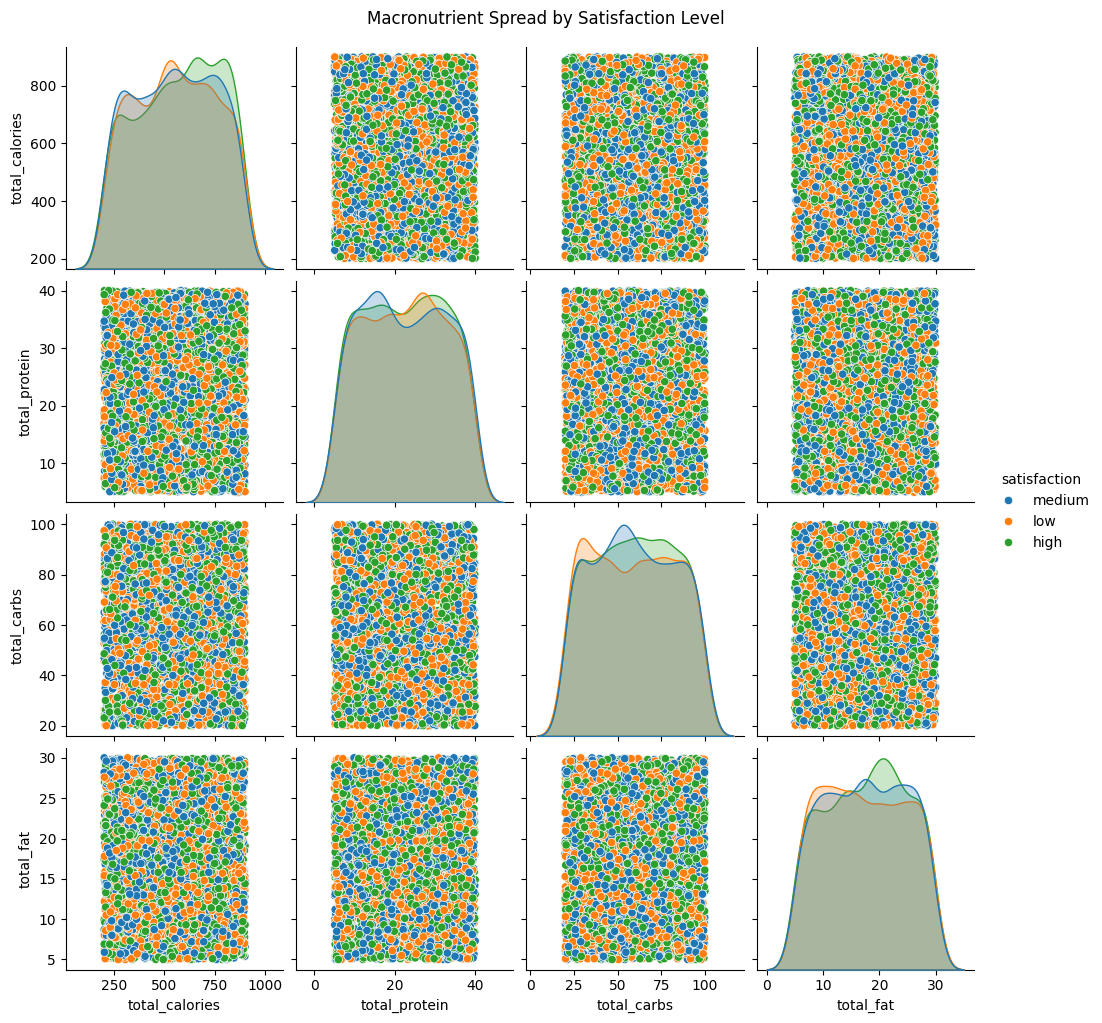

In [7]:
sns.pairplot(meals[['total_calories', 'total_protein', 'total_carbs', 'total_fat', 'satisfaction']], hue='satisfaction')
plt.suptitle("Macronutrient Spread by Satisfaction Level", y=1.02)
plt.show()


# Define Query Classes
This cell outlines examples of allowed user query classes and suggests guardrails to ensure queries are relevant and safe.

##  Define Allowed User Query Classes
Examples of query classes:

Preference-based: “I want high protein meals.”

Goal-based: “Help me lose weight.”

Restriction-based: “Avoid dairy and gluten.”

Mood-based: “Something comforting today.”

Time-based: “What can I have for dinner?”

Guardrails to add:

Regex or LLM filter to block unrelated/unsafe queries.

Only allow queries within a predefined schema or prompt structure.

# Validate User Queries
This cell defines a function to validate user queries against predefined patterns, ensuring they align with allowed query types.

In [8]:
import re

ALLOWED_QUERY_PATTERNS = [
    r".*high protein.*",
    r".*lose weight.*",
    r".*avoid.*",
    r".*comfort.*",
    r".*breakfast.*",
    r".*dinner.*"
]

def is_query_valid(query: str) -> bool:
    for pattern in ALLOWED_QUERY_PATTERNS:
        if re.match(pattern, query.lower()):
            return True
    return False


# Build User Profiles
This cell defines a function to build user profiles by aggregating user data and calculating average satisfaction levels from meal data.

In [9]:
def build_user_profile(user_id, users_df, meals_df):
    user_data = users_df[users_df["id"] == user_id].iloc[0]
    user_meals = meals_df[meals_df["user_id"] == user_id]
    
    avg_satisfaction = (
        user_meals["satisfaction"]
        .map({"low": 0, "medium": 0.5, "high": 1})
        .mean()
    )
    
    profile = {
        "goal_type": user_data["goal_type"],
        "activity_level": user_data["activity_level"],
        "health_conditions": user_data["health_conditions"],
        "avg_satisfaction": avg_satisfaction,
    }
    return profile


# Format LLM Prompt
This cell defines functions to format prompts for an LLM and simulate meal recommendations based on user profiles and queries.

In [10]:
def format_llm_prompt(user_profile, user_query):
    return f"""
You are a nutrition assistant helping users meet their goals.

User Profile:
- Goal: {user_profile['goal_type']}
- Activity Level: {user_profile['activity_level']}
- Health Conditions: {user_profile['health_conditions']}
- Historical Satisfaction: {round(user_profile['avg_satisfaction'], 2)}

User Query:
"{user_query}"

Suggest a suitable meal, explain why it fits, and give calorie, protein, carbs, and fat estimates.
"""
def get_meal_recommendation(user_id, user_query, users_df, meals_df):
    if not is_query_valid(user_query):
        return "Invalid query. Please ask about meal types or dietary preferences."

    user_profile = build_user_profile(user_id, users_df, meals_df)
    prompt = format_llm_prompt(user_profile, user_query)

    try:
        # Call the OpenAI API
        response = openai.Completion.create(
            engine="text-davinci-003",
            prompt=prompt,
            max_tokens=150
        )
        recommendation = response.choices[0].text.strip()
    except Exception as e:
        print("⚠️ LLM API call failed. Falling back to simulated response.")
        recommendation = "Recommended Meal: Grilled Chicken Salad\n" \
                         "Reason: High in protein and low in carbs.\n" \
                         "Calories: 350\nProtein: 30g\nCarbs: 20g\nFat: 15g"

    return recommendation

# Simulate Feedback Mechanism
This cell simulates the feedback mechanism and explains how feedback can be used to improve recommendations.

In [11]:
def simulate_llm_response(prompt):
    print("📤 LLM Prompt Sent:")
    print(prompt)
    return {
        "meal_name": "Grilled Tofu Salad",
        "calories": 450,
        "protein": 28,
        "carbs": 30,
        "fat": 20,
        "reason": "This meal is high in protein and low in saturated fat, ideal for your weight loss goal and cholesterol concerns."
    }


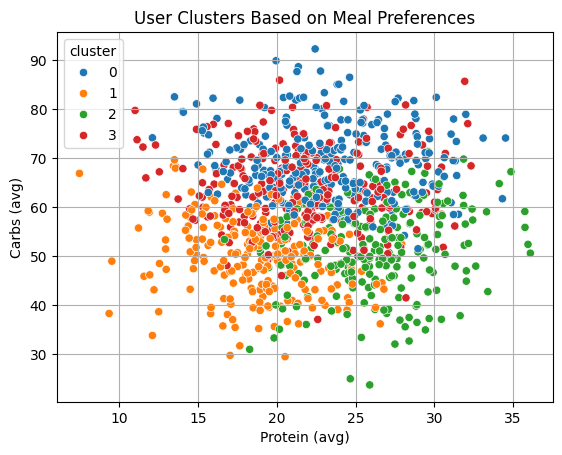

In [16]:
from sklearn.cluster import KMeans

# Selecting relevant features for clustering
features = ["total_calories", "total_protein", "total_carbs", "total_fat"]
X = user_profiles[features]

# Normalize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Run k-means clustering
kmeans = KMeans(n_clusters=4, random_state=42)
user_profiles["cluster"] = kmeans.fit_predict(X_scaled)

# Visualize clusters
sns.scatterplot(data=user_profiles, x="total_protein", y="total_carbs", hue="cluster", palette="tab10")
plt.title("User Clusters Based on Meal Preferences")
plt.xlabel("Protein (avg)")
plt.ylabel("Carbs (avg)")
plt.grid(True)
plt.show()


In [17]:
def recommend_meals_for_user(user_id, top_n=3):
    user_vector = user_profiles[user_profiles["id"] == user_id][features].values
    all_vectors = user_profiles[features].values

    similarity_scores = cosine_similarity(user_vector, all_vectors).flatten()
    similar_users = user_profiles.iloc[similarity_scores.argsort()[::-1][1:top_n+1]]["id"].values

    similar_meals = meals[meals["user_id"].isin(similar_users)]
    return similar_meals.sort_values(by="satisfaction", ascending=False).head(top_n)

# Test on a random user
random_user_id = user_profiles.sample(1)["id"].values[0]
recommend_meals_for_user(random_user_id)


,id,user_id,meal_type,total_calories,total_protein,total_carbs,total_fat,satisfaction,created_at,similarity
1195,e870e8e0-2943-4311-9ed2-d97d9a6b2e5e,d6081f67-7699-4326-8a0a-522b62519c8c,breakfast,594,9.0,35.7,23.7,medium,2025-04-01 00:01:14.238985,0.032793
3288,f7a4ec4f-5980-49f6-a587-cac9393fe84e,cb1e572c-9ca6-4996-975c-6fda8a54c353,lunch,383,11.8,46.6,20.4,medium,2025-03-26 00:01:14.253505,-0.619076
1193,2d134481-7a9b-462b-8642-9e74761171a4,d6081f67-7699-4326-8a0a-522b62519c8c,dinner,557,17.6,60.8,23.9,low,2025-04-11 00:01:14.238973,0.012198


In [18]:
def generate_user_prompt(user_row):
    return f"""User Profile:
- Age: {user_row['age']}
- Sex: {user_row['sex']}
- Activity Level: {user_row['activity_level']}
- Health Conditions: {', '.join(eval(user_row['health_conditions']))}
- Goals: {', '.join(eval(user_row['goal_type']))}
- Motivation: {user_row['motivation']}
Suggest a meal plan for today that aligns with these traits."""

sample_prompt = generate_user_prompt(user_profiles.iloc[0])
print(sample_prompt)


User Profile:
- Age: 47
- Sex: male
- Activity Level: low
- Health Conditions: diabetes, hypertension
- Goals: muscle_gain
- Motivation: Get fit for summer
Suggest a meal plan for today that aligns with these traits.


In [19]:
valid_query_types = [
    "suggest_meal_for_today",
    "suggest_high_protein_meal",
    "suggest_low_carb_snack",
    "what_did_I_eat_recently",
    "recommend_meals_for_weight_loss"
]

def validate_user_query(user_query: str) -> str:
    for q in valid_query_types:
        if q in user_query.lower():
            return q
    return "unsupported_query"

# Example
query = "suggest_high_protein_meal"
print("Query classification:", validate_user_query(query))


Query classification: suggest_high_protein_meal


In [27]:
from dotenv import load_dotenv
from openai import OpenAI
import os

load_dotenv("../.env")
client = OpenAI(api_key=os.getenv("OPENAI_API_KEY"))



def query_llm(prompt: str):
    try:
        response = client.chat.completions.create(
            model="gpt-4",
            messages=[
                {"role": "system", "content": "You are a meal planning assistant who personalizes meal suggestions based on user health data and preferences."},
                {"role": "user", "content": prompt}
            ],
            temperature=0.7,
            max_tokens=300
        )
        return response.choices[0].message.content
    except Exception as e:
        return f"❌ LLM call failed: {e}"


### Meal Recommendation using LLM

This cell integrates user profile modeling with an LLM-based response. It performs:
- Query validation against supported categories (e.g., high protein meals)
- Personalized prompt generation using user features (weight, goals, health conditions, etc.)
- An LLM call that generates a natural language meal recommendation

The response is dynamically adjusted based on user context and request type.


In [28]:
def recommend_meal_with_llm(user_id: str, query_type: str):
    user_row = user_profiles[user_profiles["id"] == user_id].iloc[0]
    prompt = generate_user_prompt(user_row)
    
    classified_query = validate_user_query(query_type)

    if classified_query == "unsupported_query":
        return "Sorry, I can't help with that type of request yet."

    final_prompt = prompt + f"\n\nUser's request: {query_type.replace('_', ' ')}.\nPlease recommend a meal accordingly."
    
    return query_llm(final_prompt)

# Test example
response = recommend_meal_with_llm(random_user_id, "suggest_high_protein_meal")
print(response)


Absolutely, I'll provide a high-protein meal plan tailored to your health conditions and goals. 

**Breakfast:** 
- Scrambled egg whites with spinach (high in protein, low in sugars and saturated fats) 
- A slice of whole grain toast (good for fiber and low GI)
- A cup of unsweetened almond milk 

**Lunch:** 
- Grilled chicken salad (high in protein and low in unhealthy fats) with a variety of veggies like lettuce, cucumber, tomato, and a light vinaigrette dressing (low in sodium for hypertension)

**Snack:** 
- A handful of unsalted almonds (good source of protein and healthy fats, but watch the portion to control calorie intake)

**Dinner:** 
- Baked salmon with a side of steamed broccoli (high in protein and omega-3 fatty acids, good for heart health) 
- Quinoa (high in protein and fiber, and has a low GI index suitable for diabetes)

**Evening Snack:** 
- Greek yogurt with a small handful of fresh berries (high in protein and calcium, low in sugar)

Remember to drink plenty of wate

In [31]:
import uuid
from datetime import datetime


feedback_store = []

def log_feedback(user_id, original_prompt, llm_response, rating, comment=""):
    feedback_store.append({
        "id": str(uuid.uuid4()),
        "user_id": user_id,
        "prompt": original_prompt,
        "response": llm_response,
        "rating": rating,
        "comment": comment,
        "timestamp": datetime.now().isoformat()
    })

# Simulate feedback
log_feedback(random_user_id, "suggest_high_protein_meal", response, rating=4, comment="Pretty good meal suggestion!")

# Visualize feedback collected
pd.DataFrame(feedback_store).head()


,id,user_id,prompt,response,rating,comment,timestamp
0,abf2fa3b-4861-4c6d-ba1c-c0465167cda1,a97a6e4f-dd0e-46f3-9b85-37dc3dd38a74,suggest_high_protein_meal,"Absolutely, I'll provide a high-protein meal p...",4,Pretty good meal suggestion!,2025-04-23T01:01:40.462570


/home/artemis/anaconda3/envs/hobbes/lib/python3.10/site-packages/pandas/plotting/_matplotlib/core.py:1567: UserWarning: Attempting to set identical low and high xlims makes transformation singular; automatically expanding.
  ax.set_xlim(left, right)
/home/artemis/anaconda3/envs/hobbes/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/home/artemis/anaconda3/envs/hobbes/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/home/artemis/anaconda3/envs/hobbes/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


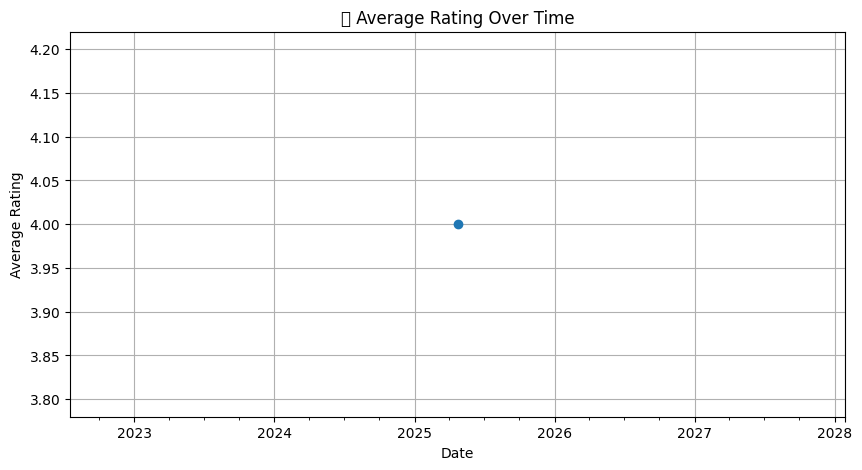

In [32]:
import matplotlib.pyplot as plt
import seaborn as sns

# Convert feedback to DataFrame
feedback_df = pd.DataFrame(feedback_store)
feedback_df['timestamp'] = pd.to_datetime(feedback_df['timestamp'])

# Average rating trend over time
plt.figure(figsize=(10, 5))
feedback_df.set_index("timestamp").resample("D")["rating"].mean().plot(marker='o')
plt.title("📈 Average Rating Over Time")
plt.ylabel("Average Rating")
plt.xlabel("Date")
plt.grid(True)
plt.show()


In [33]:
from collections import defaultdict

# Preference model: {user_id: {"suggest_high_protein_meal": [4, 5], ...}}
user_preferences = defaultdict(lambda: defaultdict(list))

# Update preferences from feedback
for entry in feedback_store:
    user_id = entry["user_id"]
    query_type = entry["prompt"]
    rating = entry["rating"]
    user_preferences[user_id][query_type].append(rating)

# Compute average ratings per query_type per user
user_avg_prefs = {}

for user_id, queries in user_preferences.items():
    user_avg_prefs[user_id] = {
        qtype: sum(ratings)/len(ratings)
        for qtype, ratings in queries.items()
    }

# Display sample preference profile
pd.DataFrame(user_avg_prefs).T.head()


,suggest_high_protein_meal
a97a6e4f-dd0e-46f3-9b85-37dc3dd38a74,4.0


In [34]:
def get_user_bias_note(user_id: str) -> str:
    if user_id not in user_avg_prefs:
        return ""
    
    low_rated = [
        query for query, avg in user_avg_prefs[user_id].items()
        if avg < 3
    ]
    if not low_rated:
        return ""
    
    return (
        "Note: The user has not liked previous recommendations for the following types: "
        + ", ".join(q.replace("_", " ") for q in low_rated) + ". "
        + "Please avoid these in your response if possible.\n"
    )

# Update recommendation function
def recommend_meal_with_feedback_bias(user_id: str, query_type: str):
    user_row = user_profiles[user_profiles["id"] == user_id].iloc[0]
    base_prompt = generate_user_prompt(user_row)
    guardrail = validate_user_query(query_type)
    
    if guardrail == "unsupported_query":
        return "Sorry, I can't help with that type of request yet."

    bias_note = get_user_bias_note(user_id)
    
    final_prompt = base_prompt + f"\n\n{bias_note}User's request: {query_type.replace('_', ' ')}.\nPlease recommend a meal accordingly."
    return query_llm(final_prompt)

# Test example
recommendation = recommend_meal_with_feedback_bias(random_user_id, "suggest_high_protein_meal")
print(recommendation)


Sure, I'd be happy to help with that. Here's a high-protein meal plan for today that is suitable for someone with diabetes, hypertension, and a goal of weight loss:

**Breakfast:**
- Scrambled Eggs with Spinach and Avocado
  - Ingredients: 2 eggs, 1 cup of fresh spinach, 1/2 medium avocado
  - Instructions: Scramble the eggs and cook the spinach in a non-stick pan, then serve with half an avocado on the side. The eggs provide a good source of protein, while the avocado provides healthy fats.

**Mid-Morning Snack:**
- Greek Yogurt with Berries
  - Ingredients: 1 cup of unsweetened Greek yogurt, 1/2 cup of mixed berries
  - Instructions: Mix the berries into the Greek yogurt and enjoy. Greek yogurt is high in protein and the berries provide a nice dose of antioxidants without adding too much sugar.

**Lunch:**
- Grilled Chicken Salad
  - Ingredients: 4 oz grilled chicken breast, 2 cups mixed greens, 1/2 cup cherry tomatoes, 1/4 cup shredded carrots, 1 tablespoon olive oil, vinegar to tas

# Database Setup
This cell sets up a SQLite database to log user interactions and feedback. It creates necessary tables if they do not already exist.

In [12]:
import sqlite3

# Connect to SQLite database (or create it if it doesn't exist)
conn = sqlite3.connect("../data/feedback.db")
cursor = conn.cursor()

# Create tables for logging user interactions and feedback
cursor.execute('''
CREATE TABLE IF NOT EXISTS user_feedback (
    id INTEGER PRIMARY KEY AUTOINCREMENT,
    user_id INTEGER,
    query TEXT,
    recommendation TEXT,
    feedback TEXT,
    timestamp DATETIME DEFAULT CURRENT_TIMESTAMP
)
''')

conn.commit()

# Log Feedback to Database
This cell updates the feedback logging function to store user feedback in the SQLite database instead of JSON files.

In [13]:
def log_feedback(user_id, query, recommendation, feedback):
    cursor.execute('''
    INSERT INTO user_feedback (user_id, query, recommendation, feedback)
    VALUES (?, ?, ?, ?)
    ''', (user_id, query, recommendation, feedback))
    conn.commit()
    print("✅ Feedback logged successfully.")

# Query Logged Feedback
This cell retrieves and displays logged feedback from the SQLite database for analysis.

In [14]:
def fetch_feedback():
    cursor.execute('''
    SELECT user_id, query, recommendation, feedback, timestamp
    FROM user_feedback
    ORDER BY timestamp DESC
    ''')
    rows = cursor.fetchall()
    
    for row in rows:
        print(f"User ID: {row[0]}\nQuery: {row[1]}\nRecommendation: {row[2]}\nFeedback: {row[3]}\nTimestamp: {row[4]}\n---")

# Fetch and display feedback
fetch_feedback()

# Load OpenAI API Key and Simulate Query
This cell loads the OpenAI API key from the .env file, simulates a user query, and displays the response.

In [15]:
import os
from dotenv import load_dotenv
import openai

# Load the OpenAI API key from the .env file
load_dotenv("../.env")
openai.api_key = os.getenv("OPENAI_API_KEY")

# Simulate a user query
user_id = 1  # Example user ID
user_query = "I want high protein meals."

# Call the OpenAI API for a recommendation
response = get_meal_recommendation(user_id, user_query, users, meals)

# Display the response
print("Response from OpenAI API:")
print(response)

ModuleNotFoundError: No module named 'dotenv'